In [13]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
import random

In [20]:
class AgentState(TypedDict) : 
    name : str
    message : str
    number : int
    counter : int

def welcome_node(state : AgentState) -> AgentState : 
    """First node of the graph that prints a welcome message"""
    state['message'] = f"Hello {state['name']}"
    state['counter'] = 0
    state['number'] = random.randint(1,10)
    return state 

def random_node(state : AgentState) -> AgentState : 
    """Second node of the graph which increments counter value"""
    state['counter'] += 1
    print(state['counter'])
    return state 

def looping_logic(state : AgentState) -> AgentState : 
    """Looping logic for graph"""
    if state['counter'] == state['number'] : 
        return "exit"
    
    else : 
        return "loop"


In [ ]:
#Initializing the graph
graph = StateGraph(AgentState)

#Adding nodes to the graph
graph.add_node("welcome_node", welcome_node)
graph.add_node("random_node", random_node)

#Adding edges to the graph
graph.add_edge(START, "welcome_node")
graph.add_edge("welcome_node", "random_node")

#Adding conditional edge to the graph
graph.add_conditional_edges("random_node", 
                            looping_logic, 
                            {
                                "loop" : "random_node",
                                "exit" : END
                            })

In [ ]:
#Compiling and running the graph
app = graph.compile()
print(app.invoke(
    {
        'name':'Ani',
    }
))

1
2
{'name': 'Ani', 'message': 'Hello Ani', 'number': 2, 'counter': 2}


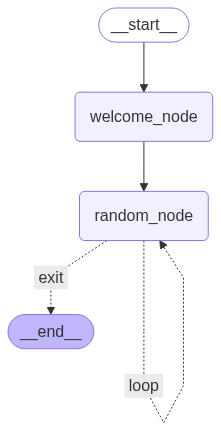

In [23]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())